# MLZoomcamp 2022 - Session #3 - Homework

Author: José Victor

* Dataset: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

In [1]:
# Dowload of dataset

%cd /home/jvictor/vs_code/mlzoomcamp2022_jvscursulim/03-classification/data

!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

/home/jvictor/vs_code/mlzoomcamp2022_jvscursulim/03-classification/data
--2022-09-23 03:44:24--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M   687KB/s    in 2.0s    

2022-09-23 03:44:26 (687 KB/s) - ‘housing.csv.1’ saved [1423529/1423529]



## Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mutual_info_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LogisticRegression

In [3]:
sns.set()

## Data preparation

* Select only the features from above and fill in the missing values with 0.

* Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe.

* Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe.

* Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe.

In [4]:
COLUMNS = ["latitude",
            "longitude",
            "housing_median_age",
            "total_rooms",
            "total_bedrooms",
            "population",
            "households",
            "median_income",
            "median_house_value",
            "ocean_proximity"]

In [5]:
df = pd.read_csv("/home/jvictor/vs_code/mlzoomcamp2022_jvscursulim/03-classification/data/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
data = df[COLUMNS].copy()
data["rooms_per_household"] = data["total_rooms"] / data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"] / data["total_rooms"]
data["population_per_household"] = data["population"] / data["households"]
data.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


## Question 1

What is the most frequent observation (mode) for the column `ocean_proximity`?

Options:

* ( ) `NEAR BAY`
* (X) `<1H OCEAN`
* ( ) `INLAND`
* ( ) `NEAR OCEAN`

In [7]:
data.ocean_proximity.mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

## Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value (`median_house_value`) is not in your dataframe.

In [8]:
TARGET = "median_house_value"
FEATURES = [col for col in data.columns if col != TARGET]
train_size = 0.6
val_size = 0.2
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(data[FEATURES], data[TARGET], test_size=test_size, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size/(test_size+train_size), random_state=42)

## Question 2

* Create the correlation matrix for the numerical features of your train dataset.
    * In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Options:

* (X) `total_bedrooms` and `households`
* ( ) `total_bedrooms` and `total_rooms`
* ( ) `population` and `households`
* ( ) `population_per_household` and `total_rooms`

In [9]:
X_train.corr()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
latitude,1.000000,-0.925005,0.002477,-0.025914,-0.059730,-0.100272,-0.063529,-0.076805,0.119118,-0.124507,-0.002301
longitude,-0.925005,1.000000,-0.099812,0.036449,0.063840,0.091670,0.049762,-0.016426,-0.034814,0.102320,0.011022
housing_median_age,0.002477,-0.099812,1.000000,-0.363522,-0.324156,-0.292476,-0.306119,-0.119591,-0.181275,0.129456,0.012167
total_rooms,-0.025914,0.036449,-0.363522,1.000000,0.931546,0.853219,0.921441,0.198951,0.168926,-0.194185,-0.029452
total_bedrooms,-0.059730,0.063840,-0.324156,0.931546,1.000000,0.877340,0.979399,-0.009833,0.010381,0.078094,-0.034301
population,-0.100272,0.091670,-0.292476,0.853219,0.877340,1.000000,0.906841,-0.000849,-0.076210,0.031592,0.064998
households,-0.063529,0.049762,-0.306119,0.921441,0.979399,0.906841,1.000000,0.011925,-0.085832,0.058004,-0.032522
median_income,-0.076805,-0.016426,-0.119591,0.198951,-0.009833,-0.000849,0.011925,1.000000,0.394154,-0.616617,-0.000454
rooms_per_household,0.119118,-0.034814,-0.181275,0.168926,0.010381,-0.076210,-0.085832,0.394154,1.000000,-0.500589,0.001801
bedrooms_per_room,-0.124507,0.102320,0.129456,-0.194185,0.078094,0.031592,0.058004,-0.616617,-0.500589,1.000000,-0.002851


<AxesSubplot:>

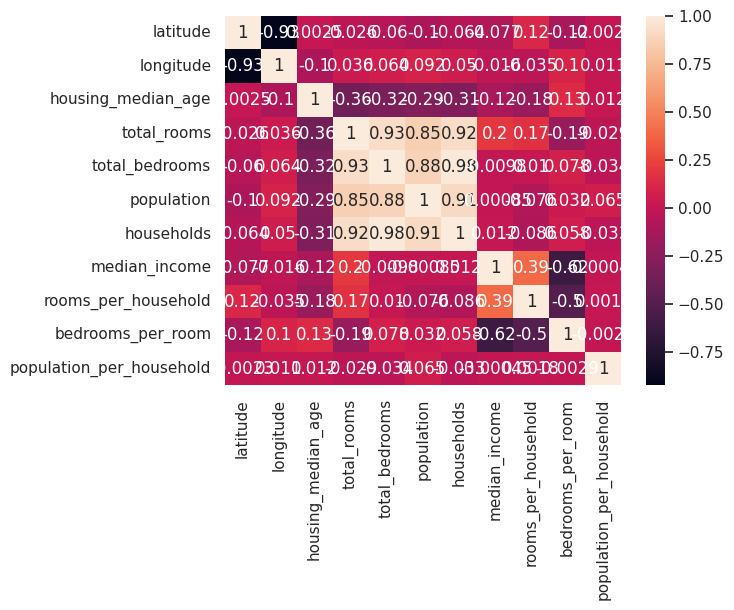

In [10]:
sns.heatmap(X_train.corr(), annot=True)

## Make `median_house_value` binary

* We need to turn the `median_house_value` variable from numeric into binary.
* Let's create a variable `above_average` which is `1` if the `median_house_value` is above its mean value and `0` otherwise.  

In [11]:
y_train = (data.iloc[X_train.index][TARGET] > data.iloc[X_train.index][TARGET].mean()).astype(int)
y_val = (data.iloc[X_val.index][TARGET] > data.iloc[X_val.index][TARGET].mean()).astype(int)

## Question 3

* Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
* What is the value of mutual information?
* Round it to 2 decimal digits using `round(score, 2)`

Options:

* ( ) 0.263
* ( ) 0.00001
* (X) 0.101
* ( ) 0.15555

In [12]:
np.round(mutual_info_score(y_train, X_train.ocean_proximity), 2)

0.1

## Question 4

* Now let's train a logistic regression.
* Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot-encoding.
* Fit the model on the training dataset.
    * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    * `model = LogisticRegression(solver="linear", C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:

* ( ) 0.60
* ( ) 0.72
* (X) 0.84
* ( ) 0.95

In [13]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [14]:
train_dict = X_train.to_dict(orient="records")
val_dict = X_val.to_dict(orient="records")
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

In [15]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [16]:
accuracy_q4 = model.score(X_val, y_val)
print(f"Accuracy on validation dataset: {accuracy_q4: .2f}")

Accuracy on validation dataset:  0.84


## Question 5

* Let's find the least useful feature using the feature elimination technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
* Which of following feature has the smallest difference?
    * (X) `total_rooms`
    * ( ) `total_bedrooms`
    * ( ) `population`
    * ( ) `households`

note: the difference doesn't have to be positive. 

In [17]:
data = df[COLUMNS].copy()
data["rooms_per_household"] = data["total_rooms"] / data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"] / data["total_rooms"]
data["population_per_household"] = data["population"] / data["households"]

In [18]:
TARGET = "median_house_value"

FEATURES_COLUMNS = ["latitude",
            "longitude",
            "housing_median_age",
            "total_rooms",
            "total_bedrooms",
            "population",
            "households",
            "median_income",
            "ocean_proximity"]

features_columns_for_experiments = [(FEATURES_COLUMNS[i], [col for col in FEATURES_COLUMNS if col != FEATURES_COLUMNS[i]]) for i in range(len(FEATURES_COLUMNS))]

In [19]:
def mutual_info(series: pd.Series) -> float:
    return mutual_info_score(series, data[TARGET])

In [20]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [21]:
accuracy_diff = []
train_size = 0.6
val_size = 0.2
test_size = 0.2

for features_tp in features_columns_for_experiments:

    X_train, X_test, y_train, y_test = train_test_split(data[features_tp[1]], data[TARGET], test_size=test_size, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size/(test_size+train_size), random_state=42)

    y_train = (data.iloc[X_train.index][TARGET] > data.iloc[X_train.index][TARGET].mean()).astype(int)
    y_val = (data.iloc[X_val.index][TARGET] > data.iloc[X_val.index][TARGET].mean()).astype(int)

    train_dict = X_train.to_dict(orient="records")
    val_dict = X_val.to_dict(orient="records")
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dict)
    X_val = dv.transform(val_dict)

    model.fit(X_train, y_train)

    accuracy = model.score(X_val, y_val)
    accuracy_diff.append((features_tp[0], accuracy_q4 - accuracy))

In [22]:
print(accuracy_diff)

[('latitude', 0.0021802325581394832), ('longitude', 0.0021802325581394832), ('housing_median_age', 0.006782945736434121), ('total_rooms', -0.0009689922480620172), ('total_bedrooms', -0.0009689922480620172), ('population', 0.016472868217054293), ('households', 0.004118217054263518), ('median_income', 0.05232558139534882), ('ocean_proximity', 0.018653100775193776)]


## Question 6

* For this question, we'll see how to use a linear regression model from Scitkit-Learn
* We'll need to use the original column `median_house_value`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (`model = Ridge(alpha=a, solver="sag", random_state=42)`) on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.

Options:

* (X) 0
* ( ) 0.01
* ( ) 0.1
* ( ) 1
* ( ) 10

In [23]:
data = df[COLUMNS].copy()
data["rooms_per_household"] = data["total_rooms"] / data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"] / data["total_rooms"]
data["population_per_household"] = data["population"] / data["households"]
data["median_house_value"] = np.log1p(data["median_house_value"].values)
data.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,13.022766,NEAR BAY,6.984127,0.146591,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,12.789687,NEAR BAY,6.238137,0.155797,2.109842
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,12.771673,NEAR BAY,8.288136,0.129516,2.802260
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,12.740520,NEAR BAY,5.817352,0.184458,2.547945
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,12.743154,NEAR BAY,6.281853,0.172096,2.181467


In [24]:
TARGET = "median_house_value"
FEATURES = [col for col in data.columns if col != TARGET]
train_size = 0.6
val_size = 0.2
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(data[FEATURES], data[TARGET], test_size=test_size, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size/(test_size+train_size), random_state=42)

In [25]:
train_dict = X_train.to_dict(orient="records")
val_dict = X_val.to_dict(orient="records")
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

In [26]:
alpha_values = [0, 0.01, 0.1, 1, 10]

rmse_scores = []
for a in alpha_values:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse_score = np.sqrt(mean_squared_error(y_true=y_val, y_pred=y_pred))
    rmse_scores.append((a, rmse_score))
    

In [27]:
print(rmse_scores)

[(0, 0.524063570701514), (0.01, 0.524063570718629), (0.1, 0.5240635708812071), (1, 0.5240635725155535), (10, 0.5240635888333284)]
